In [17]:
#importing packages
import matplotlib as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [18]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] # names used from the iris.names file
df = pd.read_csv('iris.data', names = columns)

In [19]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


f:\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


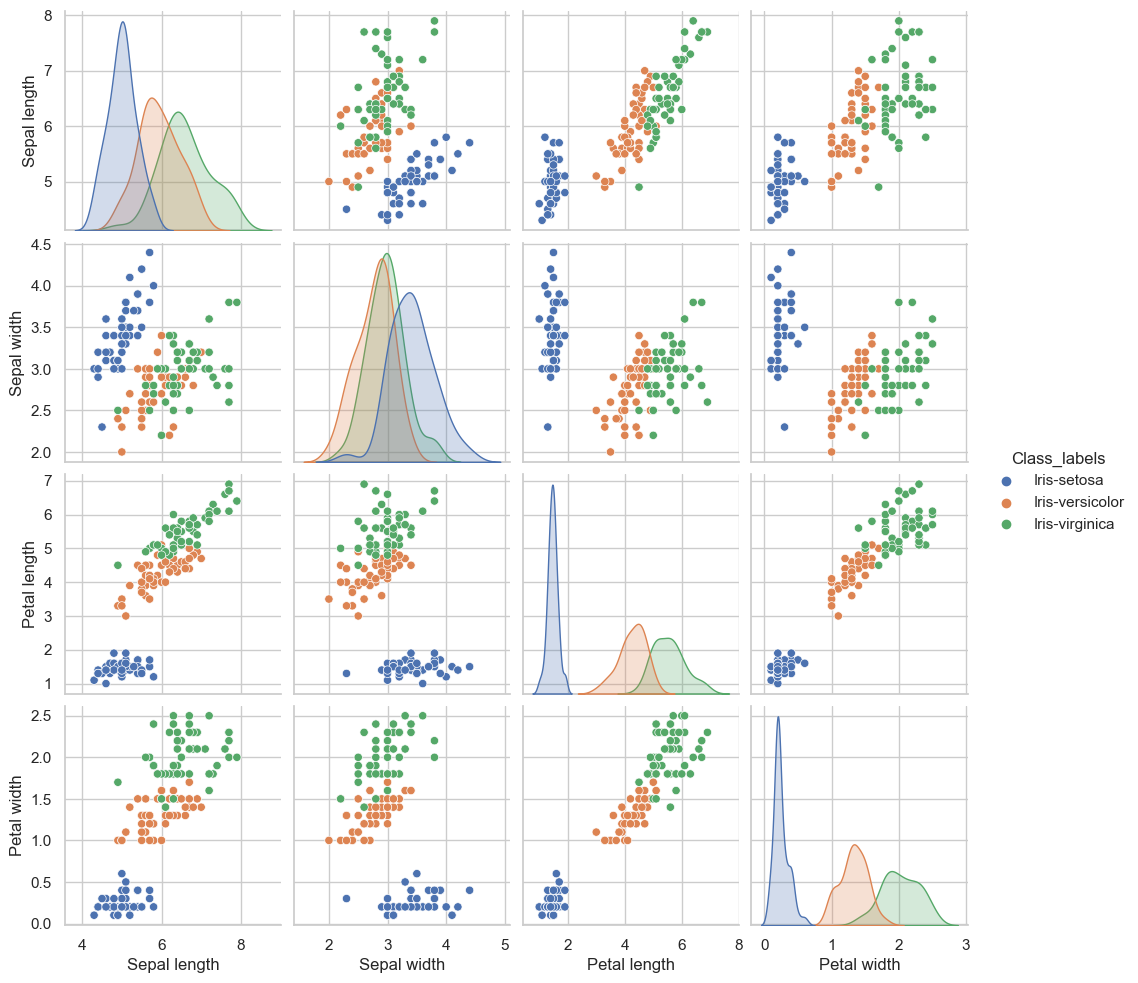

In [20]:
# plot  the entire dataset
sns.pairplot(df, hue='Class_labels')

From the graphs one can notice that Iris-setosa has the narrowest range of sepal lengths but also the longest length compared to versicolor and virginica. Petal Width of Iris-Setosa 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score


X = df.drop('Class_labels', axis=1) 
y = df['Class_labels']           
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class_labels',axis=1), 
           df['Class_labels'], test_size=0.20, 
            random_state=42)



logmodel = RandomForestClassifier()
result = logmodel.fit(X_train, y_train)

In [22]:
# # import the class
# # split X and y into training and testing sets
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# X = df.drop('Class_labels', axis=1) 
# y = df['Class_labels']    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

# # instantiate the model (using the default parameters)
# logreg = LogisticRegression(random_state=42)

# # fit the model with data
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

# logmodel = LogisticRegression()
# result = logmodel.fit(X_train, y_train)

In [23]:
from sklearn.metrics import accuracy_score
y_pred = logmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%') #Check accuracy of model

Accuracy: 100.00%


In [24]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average="macro")
print(f"f1 score: {score}")

f1 score: 1.0


In [25]:
# Get feature importances
importances = logmodel.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

        Feature  Importance
2  Petal length    0.429842
3   Petal width    0.415027
0  Sepal length    0.118250
1   Sepal width    0.036881


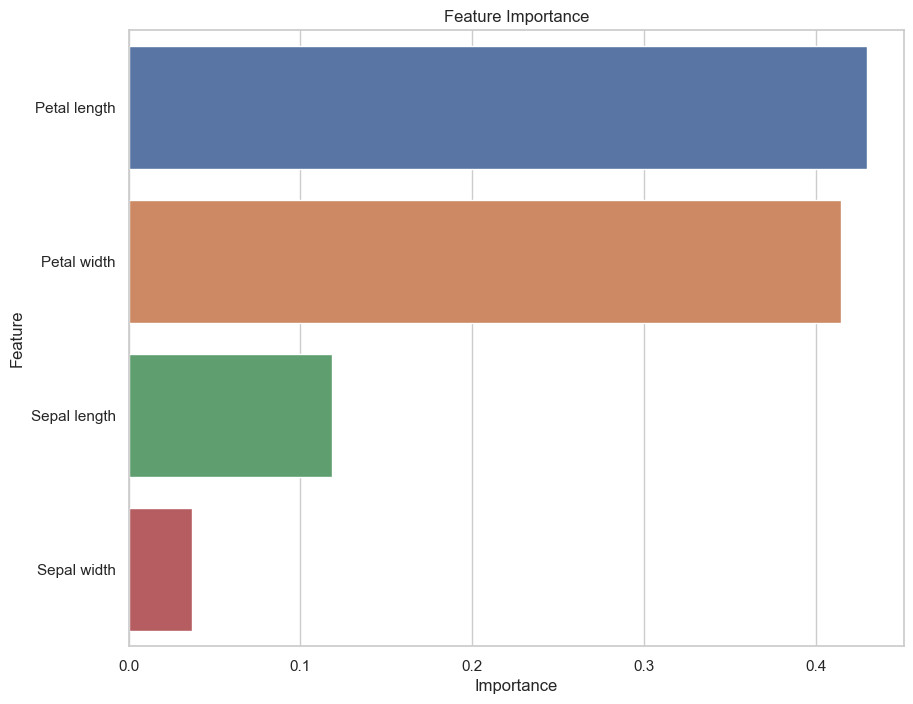

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Comparing the above graph we can see that pteal width and petal length has the greatest effect on classification - what type iris flower it is. Sepal width has the lowest effect on classification. This is reflected on the previous graph where there is little divergence between each of the flowers.